# Churn Modelling
## This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

# Aim
* 1) Identify and visualize which factors contribute to customer churn:

* 2) Build a prediction model that will perform the following:
*      Classify if a customer is going to churn or not
*          Preferably and based on model performance, choose a model that will attach a                         
           probability to the churn to make it easier for customer service to target low hanging                
           fruits in their efforts to prevent churn

# Information About the variables in dataset
* 1) **Surname :** The surname of the customer
* 2) **CreditScore :** The credit score of the customer
* 3) **Geography :** The country of the customer(Germany/France/Spain)
* 4) **Gender :** The gender of the customer (Female/Male)
* 5) **Age :** The age of the customer
* 6) **Tenure :** The customer's number of years in the in the bank
* 7) **Balance :** The customer's account balance
* 8) **NumOfProducts :** The number of bank products that the customer uses
* 9) **HasCrCard :** Does the customer has a card? (0=No,1=Yes)
* 10) **IsActiveMember :** Does the customer has an active mebership (0=No,1=Yes)
* 11) **EstimatedSalary :** The estimated salary of the customer
* 12) **Exited :** Churned or not? (0=No,1=Yes)

## Importing Dataset  

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC

In [2]:
df=pd.read_csv("Churn_Modelling.csv")#reading the csv file into df

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

 **There are no null values in the dataset**

In [5]:
#dropping RowNumber, Surname ,CustomerId because there is no use of it to analyze
df = df.drop(["RowNumber","Surname","CustomerId"],axis = 1)

In [6]:
df.shape[0]  #the size of the dataset is 10000 which is pretty much good size for fitting SVM model

10000

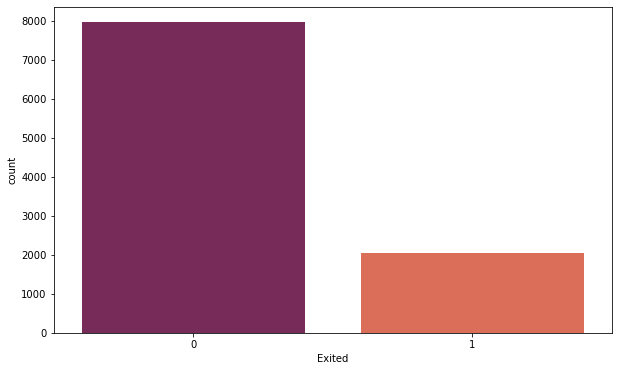

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(x='Exited',data=df,palette='rocket')

**The no. of Exited people is less than who are present**

Exited
0    AxesSubplot(0.125,0.125;0.775x0.343182)
1    AxesSubplot(0.125,0.125;0.775x0.343182)
Name: CreditScore, dtype: object

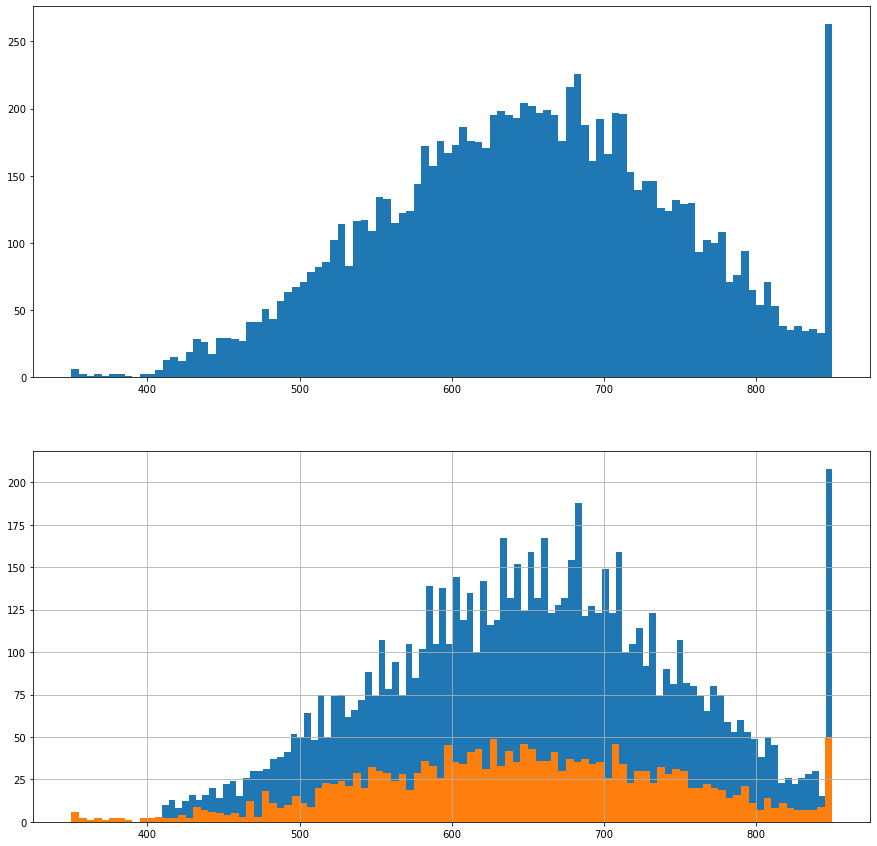

In [8]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.hist(x='CreditScore',data=df,bins=100)
plt.subplot(2,1,2)
df.groupby('Exited').CreditScore.hist(bins=100)

**From the above Histogram we can see that those who have less than 400 credit score have churned** 

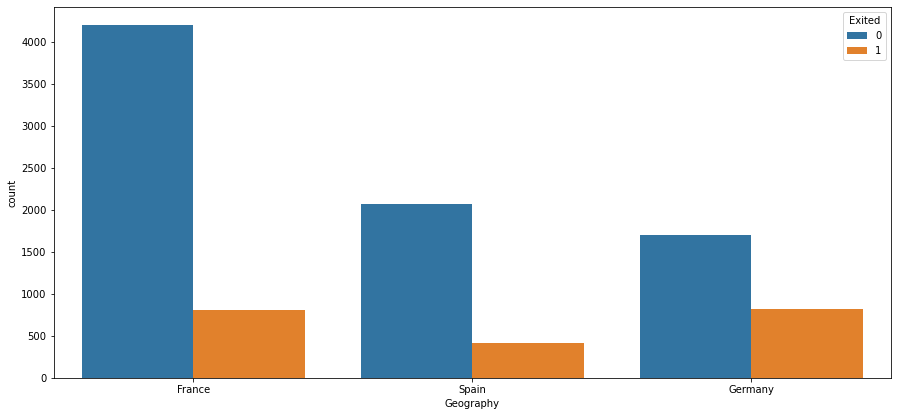

In [9]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.countplot(x='Geography',hue='Exited',data=df)


**Though the population in France is high the amount of people Exited is high in Germany**

In [10]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
df.groupby('Geography')['Exited'].sum()

Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64

Gender
Female    1139
Male       898
Name: Exited, dtype: int64

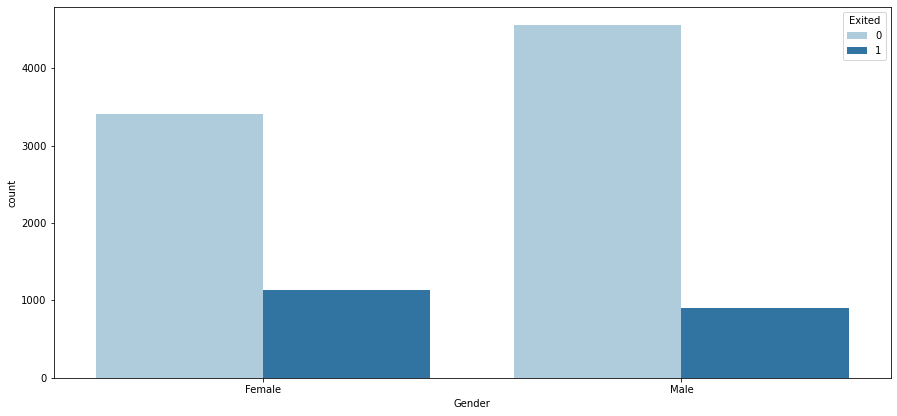

In [12]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.countplot(x='Gender',hue='Exited',data=df,palette='Paired')
df.groupby('Gender')['Exited'].sum()

**The no. of Female have Exited more than male** 

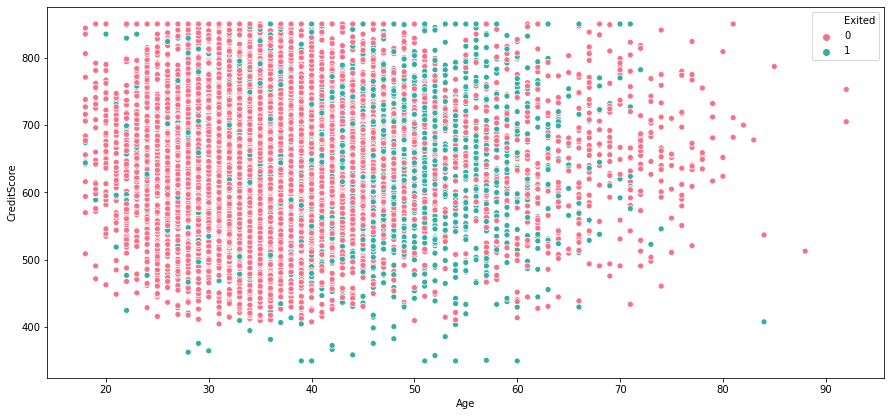

In [13]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.scatterplot(x=df['Age'],y=df['CreditScore'],hue='Exited',palette='husl',data=df)

**Credit Score no effect on exit decion but we can there are signifcant no. of members exited after the age of 40**

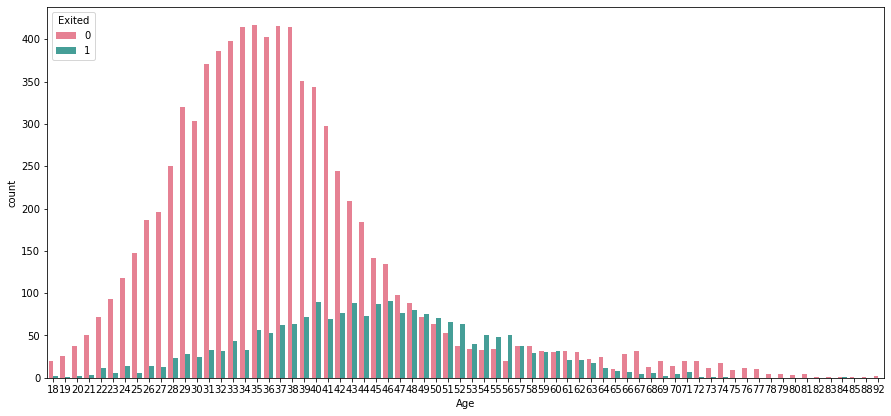

In [14]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.countplot(x='Age',hue='Exited',data=df,palette='husl')
plt.show()

**As you can see there is a rise in exit rate form age 40-46 and again decreasing**

Balance
0.00         500
3768.69        1
12459.19       1
14262.80       0
16893.59       0
            ... 
216109.88      1
221532.80      0
222267.63      1
238387.56      1
250898.09      1
Name: Exited, Length: 6382, dtype: int64

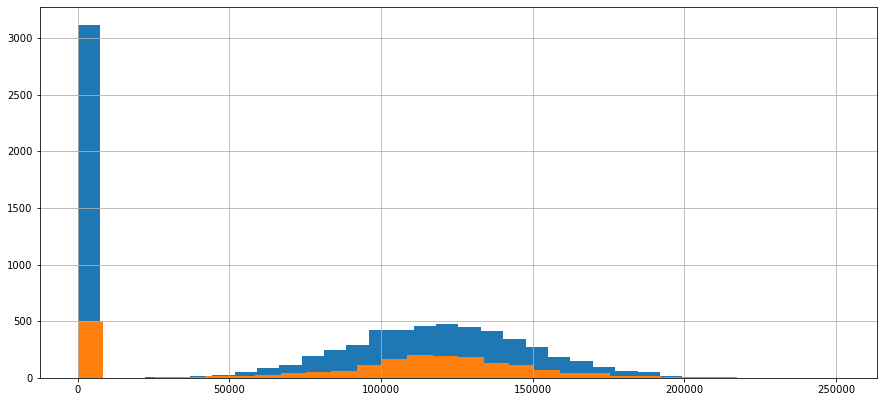

In [15]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
df.groupby('Exited').Balance.hist(bins=30)
df.groupby('Balance')['Exited'].sum()

**People who have 0 balance have exited the bank**

NumOfProducts
1    1409
2     348
3     220
4      60
Name: Exited, dtype: int64

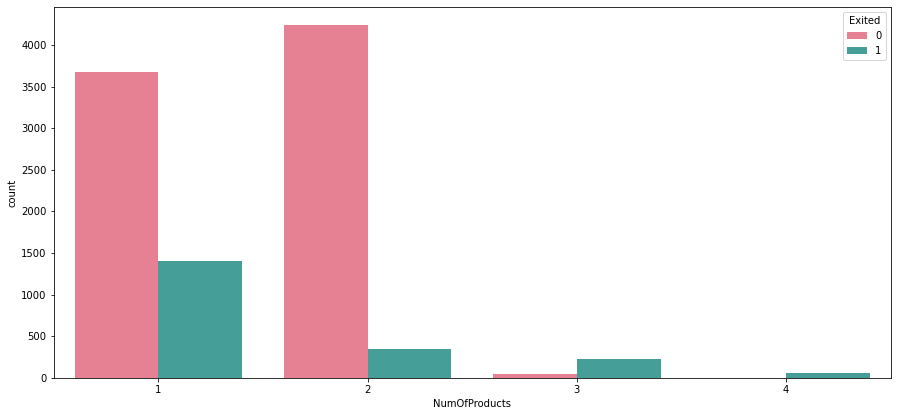

In [16]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.countplot(x="NumOfProducts",hue='Exited',data=df,palette='husl')
df.groupby('NumOfProducts')['Exited'].sum()

**Costumers who used only 1 bank product have exited more** 

HasCrCard
0     613
1    1424
Name: Exited, dtype: int64

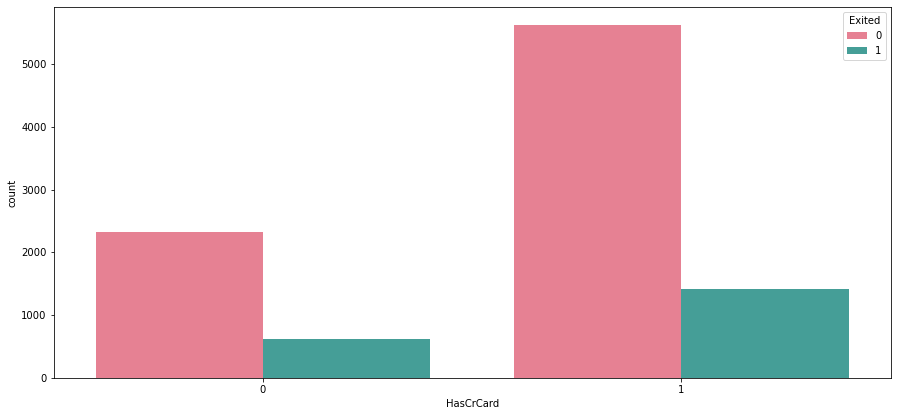

In [17]:
plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
sns.countplot(x="HasCrCard",hue='Exited',data=df,palette='husl')
df.groupby('HasCrCard')['Exited'].sum()

**People who have credit card have exited more**

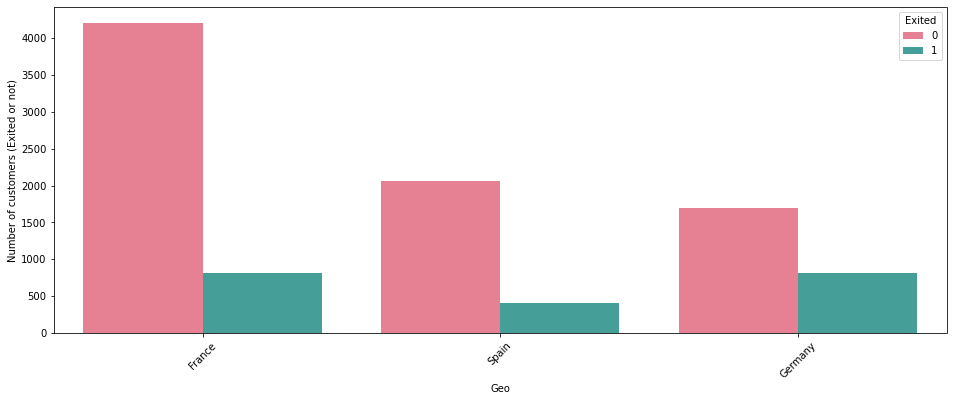

In [18]:
plt.figure(figsize = (16,6)) 
plt.xticks(rotation=45)
sns.countplot(x=df["Geography"],hue = 'Exited',data=df, palette="husl");
plt.xlabel('Geo')
plt.ylabel('Number of customers (Exited or not)');

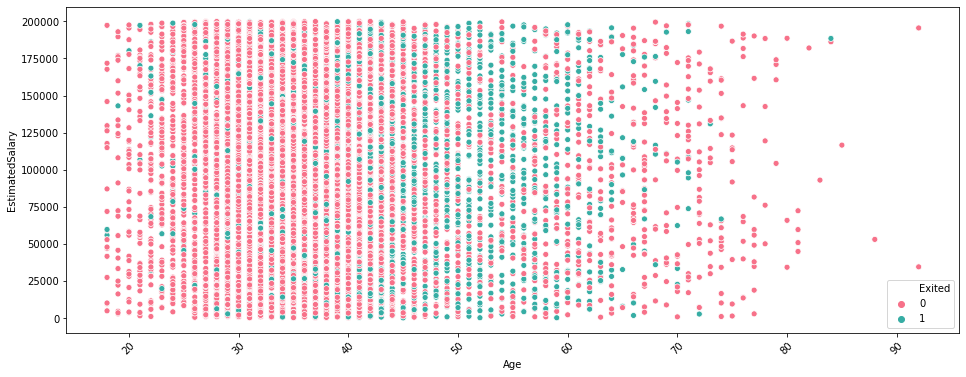

In [19]:
plt.figure(figsize = (16,6)) 
plt.xticks(rotation=45)
sns.scatterplot(x='Age',y = "EstimatedSalary",hue = "Exited",data=df,palette='husl');

**Salary has no effect on exit decision**

<Figure size 1080x432 with 0 Axes>

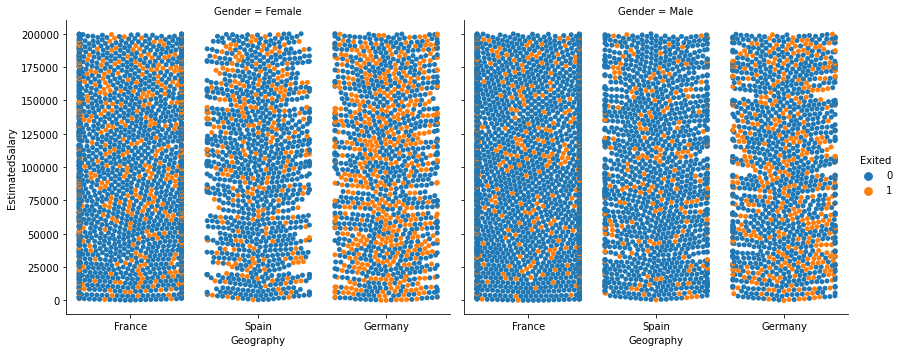

In [20]:
plt.figure(figsize = (15,6));
sns.catplot(x='Geography',
            y = "EstimatedSalary",
            hue="Exited",
            col="Gender",
            aspect=1.2,height=5,
            kind="swarm", data=df);
plt.show()

**We can see from the above catplot Females in Germany have Exited more** 

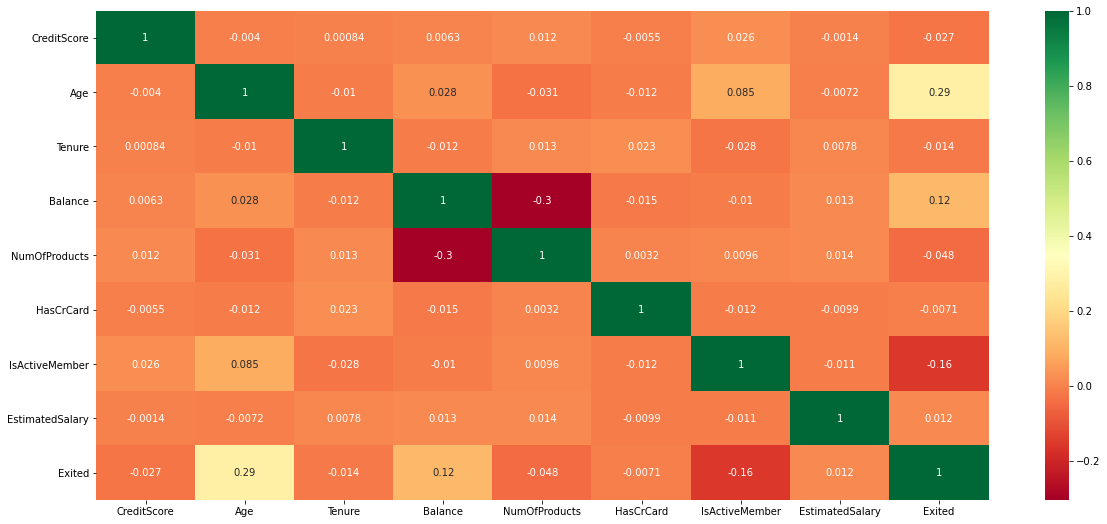

In [21]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,9))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [22]:
#We are grouping different ages into a new age range
age_group_data = [None]*len(df['Age'])
for i in range(len(df['Age'])):
    if df['Age'][i] < 30:
        age_group_data[i] = 'Young'
    elif df['Age'][i] >=30 and df['Age'][i] < 40:
        age_group_data[i] = 'Young-Adults'
    elif df['Age'][i] >=40 and df['Age'][i] < 50:
        age_group_data[i] = 'Adults'
    elif df['Age'][i] >=50 and df['Age'][i] < 60:
        age_group_data[i] = 'Elderly-Adults'
    elif df['Age'][i] >=60 and df['Age'][i] < 74:
        age_group_data[i] = 'Old'
    else:
        age_group_data[i] = 'Very-Old'

df['new_age'] = age_group_data

In [23]:
#Creating a new credit score those who have below 405 and above it
Credit = [None] * len(df['CreditScore'])
for i in range(len(df['CreditScore'])):
    if df['CreditScore'][i] < 405:
        Credit[i] = 0
    else:
        Credit[i] = 1
        
df['new_credit'] = Credit


In [24]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_age,new_credit
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Adults,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Adults,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Adults,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Young-Adults,1
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Adults,1


In [25]:
geo=pd.get_dummies(df['Geography'],drop_first=True)
geo.head()

,Germany,Spain
0,0,0
1,0,1
2,0,0
3,0,0
4,0,1


In [26]:
gen=pd.get_dummies(df['Gender'],drop_first=True)
gen.sum()

Male    5457
dtype: int64

In [27]:
gen.head()

,Male
0,0
1,0
2,0
3,0
4,0


In [28]:
nage=pd.get_dummies(df['new_age'])

In [29]:
df=df.drop(['Geography','Gender','new_age','CreditScore'],axis=1)

In [30]:
df=pd.concat([df,geo,gen,nage],axis=1)

In [31]:
df=df.drop(['Age'],axis=1)

In [32]:
df.head()

,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,new_credit,Germany,Spain,Male,Adults,Elderly-Adults,Old,Very-Old,Young,Young-Adults
0,2,0.00,1,1,1,101348.88,1,1,0,0,0,1,0,0,0,0,0
1,1,83807.86,1,0,1,112542.58,0,1,0,1,0,1,0,0,0,0,0
2,8,159660.80,3,1,0,113931.57,1,1,0,0,0,1,0,0,0,0,0
3,1,0.00,2,0,0,93826.63,0,1,0,0,0,0,0,0,0,0,1
4,2,125510.82,1,1,1,79084.10,0,1,0,1,0,1,0,0,0,0,0


In [33]:
#import libraries for creating model and model Estimation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve, precision_recall_curve,classification_report,mean_absolute_error, mean_squared_error
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score

In [34]:
x = df.drop(["Exited"],axis = 1) #Independent value
y = df["Exited"] #Depended value 

**If we use the SVC class, it is much slower, especially with large training sets, so it is not recommended. Another
option is to use the SGDClassifier class, with SGDClassifier This applies regular Stochastic Gradient Descent to
train a linear SVM classifier. It can be useful to handle huge datasets that do not fit in memory (out-of-core training),
or to handle online classification tasks.**

In [35]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor( penalty=None, eta0=0.1)
sgd_reg.fit(x, y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [36]:
# MinMaxScalar is used to narmalize the dataset to give better accuracy
from sklearn.preprocessing import MinMaxScaler
norm = MinMaxScaler().fit(x)
x_norm = norm.transform(x)

In [37]:
# Splitting the data into traing and testing data set 
x_train,x_test,y_train,y_test = train_test_split(x_norm,y,test_size = 0.3, random_state = 42)

## Using Linear SVM
**Linear SVM is the newest extremely fast machine learning (data mining) algorithm for solving multiclass classification problems from ultra large data sets that implements an original proprietary version of a cutting plane algorithm for designing a linear support vector machine. LinearSVM is a linearly scalable routine meaning that it creates an SVM model in a CPU time which scales linearly with the size of the training data set. Our comparisons with other known SVM models clearly show its superior performance when high accuracy is required. We would highly appreciate if you may share LinearSVM performance on your data sets with us.**

In [47]:
#Fitting the model 
svcm=SVC(kernel='linear',C=100,gamma=0.1,probability=True).fit(x_train,y_train)

In [48]:
#Predicting the values of test dataset
pred=svcm.predict(x_test)

In [53]:
import numpy as np
predlp=svcm.predict_proba(x_test)
predlp=predlp[:,1]

**Confusion Matrix To estimate the model's Performance**

In [54]:
svm_con=confusion_matrix(y_test,pred)
svm_con

array([[2303,  113],
       [ 431,  153]], dtype=int64)

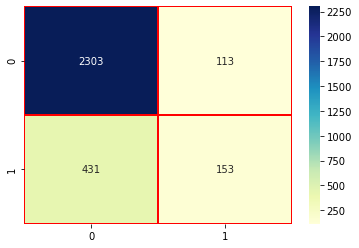

In [55]:
sns.heatmap(data=svm_con, annot=True, linewidth=0.7, linecolor='red', fmt='.0f', ax=None, cmap='YlGnBu')

We have predicted 2303 true values those who have not exited and 153 members those whohave exited
and 113 members predicted false those who have not exited
431 false prediction those who have exited 

In [56]:
accuracy_score(y_test,pred)

0.8186666666666667

Accuracy: The most commonly used metric to judge a model and is actually not a clear indicator of the performance. The worse happens when classes are imbalanced.
(TP+TN) / (TP+TN+FP+FN)

**Using ROC curve:**
ROC stands for receiver operating characteristic and the graph is plotted against TPR and FPR for various threshold values. As TPR increases FPR also increases. As you can see in the first figure, we have four categories and we want the threshold value that leads us closer to the top left corner.

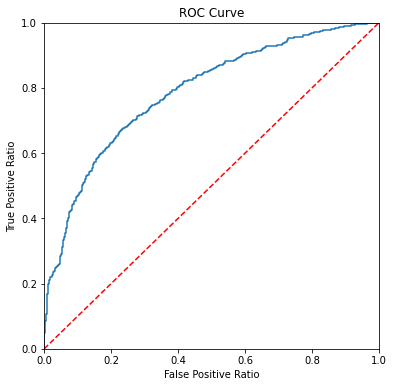

In [57]:
logit_roc_auc = roc_auc_score(y_test,predlp)
fpr, tpr, tresholds = roc_curve(y_test,predlp)
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label = "AUC (area = %0.2f)"%logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.title('ROC Curve');

In [58]:
print("roc_auc score is:{:.2f}".format(logit_roc_auc*100))

roc_auc score is:78.68


**PR curve:**
It is the curve between precision and recall for various threshold values. 

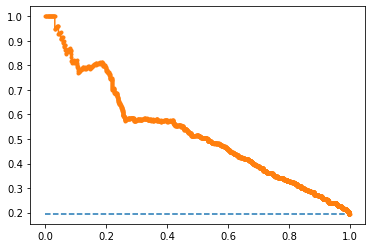

In [60]:
from sklearn.metrics import auc
from matplotlib import pyplot
lr_precision, lr_recall, _ = precision_recall_curve(y_test, predlp)
lr_f1, lr_auc = f1_score(y_test,pred), auc(lr_recall, lr_precision)
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')

**Logarithmic Loss**
Logarithmic loss (logloss) measures the performance of a classification model where the prediction input is a probability value between 0 and 1. Log loss increases as the predicted probability diverges from the actual label. The goal of machine learning models is to minimize this value. As such, smaller logloss is better, with a perfect model having a log loss of 0.

In [61]:
logacc = log_loss(y_test, pred)
print("Logloss: %.2f" % (logacc))

Logloss: 6.26


**Precision**
Percentage of positive instances out of the total predicted positive instances. Here denominator is the model prediction done as positive from the whole given dataset. Take it as to find out ‘how much the model is right when it says it is right’.


In [62]:
precision = precision_score(y_test, pred)
print('Precision: %f' % precision)

Precision: 0.575188


**Recall/Sensitivity/True Positive Rate**
Percentage of positive instances out of the total actual positive instances. Therefore denominator (TP + FN) here is the actual number of positive instances present in the dataset. Take it as to find out ‘how much extra right ones, the model missed when it showed the right ones’.

In [63]:
recall = recall_score(y_test, pred)
print('Recall: %f' % recall)

Recall: 0.261986


**F1 score**
It is the harmonic mean of precision and recall. This takes the contribution of both, so higher the F1 score, the better. See that due to the product in the numerator if one goes low, the final F1 score goes down significantly. So a model does well in F1 score if the positive predicted are actually positives (precision) and doesn't miss out on positives and predicts them negative (recall).

In [64]:
f1 = f1_score(y_test, pred)
print('F1 score: %f' % f1)

F1 score: 0.360000


In [65]:
clsrep=classification_report(y_test,pred)
print(clsrep)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      2416
           1       0.58      0.26      0.36       584

    accuracy                           0.82      3000
   macro avg       0.71      0.61      0.63      3000
weighted avg       0.79      0.82      0.79      3000



**Regression Metrics**
The Mean Absolute Error (or MAE) is the sum of the absolute differences between predictions and actual values. On the other hand, Root Mean Squared Error (RMSE) measures the average magnitude of the error by taking the square root of the average of squared differences between prediction and actual observation.

In [66]:
from math import sqrt
print("MAE test score:", mean_absolute_error(y_test, pred))
print("RMSE test score:", sqrt(mean_squared_error(y_test, pred)))

MAE test score: 0.18133333333333335
RMSE test score: 0.42583251793790167


## Using RBF kernel

**Gaussian RBF(Radial Basis Function) is another popular Kernel method used in SVM models for more. RBF kernel is a function whose value depends on the distance from the origin or from some point.**

In [67]:
svc_rbf=SVC(kernel='rbf',C=500,gamma=0.1,probability=True).fit(x_train,y_train)

In [68]:
pred_rbf=svc_rbf.predict(x_test)

In [70]:
predrp=svc_rbf.predict_proba(x_test)
predrp=predrp[:,1]

In [71]:
svm_con=confusion_matrix(y_test,pred_rbf)
svm_con

array([[2318,   98],
       [ 306,  278]], dtype=int64)

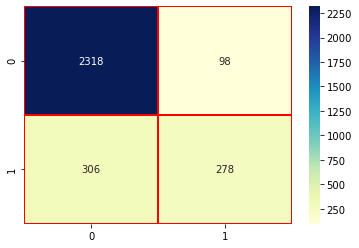

In [72]:
sns.heatmap(data=svm_con, annot=True, linewidth=0.7, linecolor='red', fmt='.0f', ax=None, cmap='YlGnBu')

In [73]:
accuracy_score(y_test,pred_rbf)

0.8653333333333333

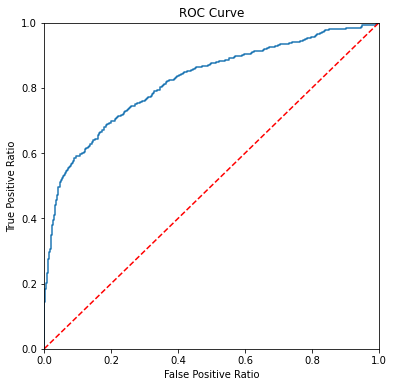

In [74]:
logit_roc_auc = roc_auc_score(y_test,predrp)
fpr, tpr, tresholds = roc_curve(y_test,predrp)
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label = "AUC (area = %0.2f)"%logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.title('ROC Curve');

In [75]:
print("roc_auc score is:{:.2f}".format(logit_roc_auc*100))

roc_auc score is:81.96


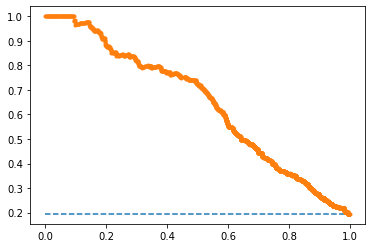

In [76]:
from sklearn.metrics import auc
from matplotlib import pyplot
lr_precision, lr_recall, _ = precision_recall_curve(y_test, predrp)
lr_f1, lr_auc = f1_score(y_test,pred), auc(lr_recall, lr_precision)
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')

In [77]:
logacc = log_loss(y_test, pred_rbf)
print("Logloss: %.2f" % (logacc))

Logloss: 4.65


In [78]:
precision = precision_score(y_test, pred_rbf)
print('Precision: %f' % precision)

Precision: 0.739362


In [79]:
recall = recall_score(y_test, pred_rbf)
print('Recall: %f' % recall)

Recall: 0.476027


In [80]:
f1 = f1_score(y_test, pred_rbf)
print('F1 score: %f' % f1)

F1 score: 0.579167


In [81]:
clsrep=classification_report(y_test,pred_rbf)
print(clsrep)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.74      0.48      0.58       584

    accuracy                           0.87      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.86      0.87      0.85      3000



In [82]:
from math import sqrt
print("MAE test score:", mean_absolute_error(y_test, pred_rbf))
print("RMSE test score:", sqrt(mean_squared_error(y_test, pred_rbf)))

MAE test score: 0.13466666666666666
RMSE test score: 0.3669695718539436


## Using Polynomial kernel 

**The polynomial kernel is a kernel function commonly used with support vector machines (SVMs) and other kernelized models, that represents the similarity of vectors (training samples) in a feature space over polynomials of the original variables, allowing learning of non-linear models.**

**Intuitively, the polynomial kernel looks not only at the given features of input samples to determine their similarity, but also combinations of these. In the context of regression analysis, such combinations are known as interaction features. The (implicit) feature space of a polynomial kernel is equivalent to that of polynomial regression, but without the combinatorial blowup in the number of parameters to be learned. When the input features are binary-valued (booleans), then the features correspond to logical conjunctions of input features.** 

In [83]:
svc_poly=SVC(kernel='poly',C=500,gamma=0.1,degree=3,probability=True).fit(x_train,y_train)

In [84]:
pred_poly=svc_poly.predict(x_test)

In [100]:
predpp=svc_poly.predict_proba(x_test)
predpp=predpp[:,1]

In [101]:
accuracy_score(y_test,pred_poly)

0.8616666666666667

In [102]:
svm_p=confusion_matrix(y_test,pred_poly)
svm_p

array([[2314,  102],
       [ 313,  271]], dtype=int64)

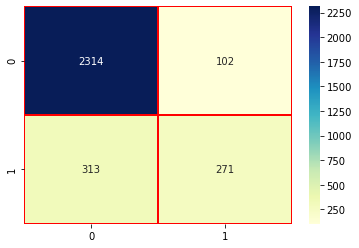

In [103]:
sns.heatmap(data=svm_p, annot=True, linewidth=0.7, linecolor='red', fmt='.0f', ax=None, cmap='YlGnBu')

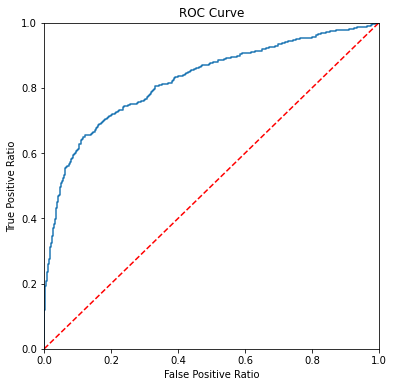

In [104]:
logit_roc_auc = roc_auc_score(y_test,predpp)
fpr, tpr, tresholds = roc_curve(y_test,predpp)
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label = "AUC (area = %0.2f)"%logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.title('ROC Curve');

In [105]:
print("roc_auc score is:{:.2f}".format(logit_roc_auc*100))

roc_auc score is:82.39


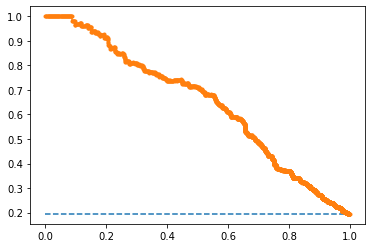

In [106]:
from sklearn.metrics import auc
from matplotlib import pyplot
lr_precision, lr_recall, _ = precision_recall_curve(y_test, predpp)
lr_f1, lr_auc = f1_score(y_test,pred_poly), auc(lr_recall, lr_precision)
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')

In [93]:
logacc = log_loss(y_test, pred_poly)
print("Logloss: %.2f" % (logacc))

Logloss: 4.78


In [94]:
precision = precision_score(y_test, pred_poly)
print('Precision: %f' % precision)

Precision: 0.726542


In [95]:
recall = recall_score(y_test, pred_poly)
print('Recall: %f' % recall)

Recall: 0.464041


In [96]:
f1 = f1_score(y_test, pred_poly)
print('F1 score: %f' % f1)

F1 score: 0.566353


In [97]:
clsrep=classification_report(y_test,pred_rbf)
print(clsrep)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2416
           1       0.74      0.48      0.58       584

    accuracy                           0.87      3000
   macro avg       0.81      0.72      0.75      3000
weighted avg       0.86      0.87      0.85      3000



In [98]:
from math import sqrt
print("MAE test score:", mean_absolute_error(y_test, pred_rbf))
print("RMSE test score:", sqrt(mean_squared_error(y_test, pred_rbf)))

MAE test score: 0.13466666666666666
RMSE test score: 0.3669695718539436


##  Using Sigmoid kernel

**The Hyperbolic Tangent Kernel is also known as the Sigmoid Kernel and as the Multilayer Perceptron (MLP) kernel. The Sigmoid Kernel comes from the Neural Networks field, where the bipolar sigmoid function is often used as an activation function for artificial neurons.**

**k(x, y) = tanh (alpha x^T y + c)** 

In [123]:
sv=SVC(kernel='log').fit(x_train,y_train)

In [99]:
svc_sig=SVC(kernel='sigmoid',C=100,gamma=0.1,probability=True).fit(x_train,y_train)

In [109]:
pred_sig=svc_sig.predict(x_test)

In [110]:
predps=svc_sig.predict_proba(x_test)
predps=predps[:,1]

In [111]:
accuracy_score(y_test,pred_sig)

0.7536666666666667

In [112]:
svm_p=confusion_matrix(y_test,pred_sig)
svm_p

array([[2040,  376],
       [ 363,  221]], dtype=int64)

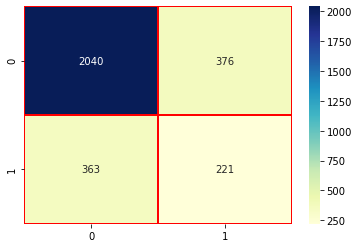

In [113]:
sns.heatmap(data=svm_p, annot=True, linewidth=0.7, linecolor='red', fmt='.0f', ax=None, cmap='YlGnBu')

In [115]:
print("roc_auc score is:{:.2f}".format(logit_roc_auc*100))

roc_auc score is:66.34


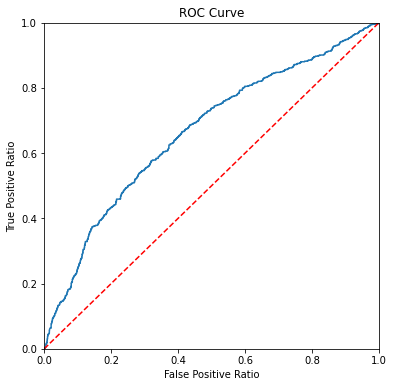

In [114]:
logit_roc_auc = roc_auc_score(y_test,predps)
fpr, tpr, tresholds = roc_curve(y_test,predps)
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr,label = "AUC (area = %0.2f)"%logit_roc_auc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.xlabel("False Positive Ratio")
plt.ylabel("True Positive Ratio")
plt.title('ROC Curve');

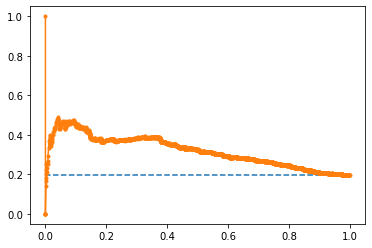

In [116]:
from sklearn.metrics import auc
from matplotlib import pyplot
lr_precision, lr_recall, _ = precision_recall_curve(y_test, predps)
lr_f1, lr_auc = f1_score(y_test,pred_sig), auc(lr_recall, lr_precision)
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Logistic')

In [117]:
logacc = log_loss(y_test, pred_sig)
print("Logloss: %.2f" % (logacc))

Logloss: 8.51


In [118]:
precision = precision_score(y_test, pred_sig)
print('Precision: %f' % precision)

Precision: 0.370184


In [119]:
recall = recall_score(y_test, pred_sig)
print('Recall: %f' % recall)

Recall: 0.378425


In [120]:
f1 = f1_score(y_test, pred_sig)
print('F1 score: %f' % f1)

F1 score: 0.374259


In [121]:
clsrep=classification_report(y_test,pred_sig)
print(clsrep)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      2416
           1       0.37      0.38      0.37       584

    accuracy                           0.75      3000
   macro avg       0.61      0.61      0.61      3000
weighted avg       0.76      0.75      0.75      3000



In [122]:
from math import sqrt
print("MAE test score:", mean_absolute_error(y_test, pred_sig))
print("RMSE test score:", sqrt(mean_squared_error(y_test, pred_sig)))

MAE test score: 0.24633333333333332
RMSE test score: 0.4963197893831489
